In [92]:
from mintpy.utils import *
import mintpy.utils as mpu
import mintpy.utils.readfile
import mintpy.utils.utils
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib
import numpy as np
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

In [93]:
sns.set_theme()
sns.set_style("ticks")
sns.set_context("paper")
# sns.set_theme(style="white") #, font_scale=0.5)
plt.style.use(['seaborn-paper', 'seaborn-ticks'])
sns.set_color_codes()

In [94]:
matplotlib.rcParams['lines.linewidth']
matplotlib.rcParams['axes.linewidth']
plt.style.available
matplotlib.use("pgf")
matplotlib.rcParams.update({    
    'font.family': 'serif',
    'font.serif': [],       # use latex default serif font
    'font.sans-serif': [],  # use a specific sans-serif font
    'font.monospace': [],   # use a specific sans-serif font
    'text.usetex': True,
    'pgf.rcfonts': False,
    'pgf.texsystem': 'pdflatex',
    'lines.linewidth': 0.7,
    'axes.linewidth': 0.6,
    'axes.unicode_minus': False
})

golden_ratio = (5**.5 - 1) / 2

width  = 3.48761
height = width*golden_ratio
print(width,height)

3.48761 2.155461519504021


In [95]:
mask_data, mask_attr = mpu.readfile.read('/data1/data/sar_jhb_dumps/mintpy/maskROI.h5')

In [96]:
mask_attr

{'ALOOKS': '2',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '35.246762617962254',
 'CENTER_LINE_UTC': '60414.0',
 'DATA_TYPE': 'bool',
 'DATE12': '20171102_20201228',
 'EARTH_RADIUS': '6372916.232867104',
 'END_DATE': '20201228',
 'FILE_LENGTH': '2785',
 'FILE_PATH': '/data1/data/sar_jhb_dumps/mintpy/maskROI.h5',
 'FILE_TYPE': 'mask',
 'HEADING': '-1.260372609972952e+01',
 'HEIGHT': '707266.2511479785',
 'INCIDENCE_ANGLE': '3.901818002255490e+01',
 'LAT_REF1': '-26.6842879645658',
 'LAT_REF2': '-26.4644430053711',
 'LAT_REF3': '-26.35441583861653',
 'LAT_REF4': '-26.13532301691702',
 'LENGTH': '36',
 'LONG_REF1': '27.21457286093934',
 'LONG_REF2': '28.13658642471043',
 'LONG_REF3': '27.12070330797209',
 'LONG_REF4': '28.04000415979327',
 'ORBIT_DIRECTION': 'ASCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '38.81139373779297',
 'P_BASELINE_TOP_HDR': '38.81139373779297',
 'RANGE_PIXEL_SIZE': '30.7259

In [97]:
plt.imshow(mask_data)

In [98]:
mask_data_temp, mask_attr_temp = mpu.readfile.read('/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/maskTempCoh.h5')
plt.imshow(mask_data_temp)

In [99]:
plt.imshow(mask_data*mask_data_temp)
mask_data = mask_data*mask_data_temp

In [100]:
ts_file = '/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5'

In [101]:
ts_data, ts_attr = mpu.readfile.read(ts_file)

In [102]:
ts_attr

{'ALOOKS': '2',
 'ANTENNA_SIDE': '-1',
 'AZIMUTH_PIXEL_SIZE': '35.246762617962254',
 'CENTER_LINE_UTC': '60414.0',
 'DATA_TYPE': 'float32',
 'DATE12': '171102-180101',
 'EARTH_RADIUS': '6372916.232867104',
 'END_DATE': '20201228',
 'FILE_LENGTH': '2785',
 'FILE_PATH': '/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5',
 'FILE_TYPE': 'timeseries',
 'HEADING': '-1.260372609972952e+01',
 'HEIGHT': '707266.2511479785',
 'INCIDENCE_ANGLE': '3.901818002255490e+01',
 'LAT_REF1': '-26.6842879645658',
 'LAT_REF2': '-26.4644430053711',
 'LAT_REF3': '-26.35441583861653',
 'LAT_REF4': '-26.13532301691702',
 'LENGTH': '36',
 'LONG_REF1': '27.21457286093934',
 'LONG_REF2': '28.13658642471043',
 'LONG_REF3': '27.12070330797209',
 'LONG_REF4': '28.04000415979327',
 'ORBIT_DIRECTION': 'ASCENDING',
 'PLATFORM': 'sen',
 'PRF': '1717.128973878037',
 'PROCESSOR': 'snap',
 'PROJECT_NAME': 'mintpy',
 'P_BASELINE_BOTTOM_HDR': '38.81139373779297',
 'P_BASELINE_TOP_HDR': '38.811393

In [103]:
from mintpy.objects import (
    geometryDatasetNames,
    geometry,
    ifgramStack,
    timeseries,
)
from mintpy.utils import ptime, readfile

In [104]:
obj = timeseries(ts_file)

In [105]:
date_list = timeseries(ts_file).get_date_list()

In [106]:
the_dates, dis = mpu.utils.read_timeseries_yx(0,0, ts_file=ts_file)

input y / x: 0 / 0


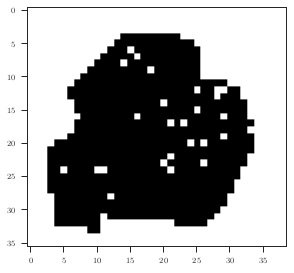

In [107]:
fig =plt.figure()
plt.imshow(mask_data)
fig

In [108]:
a = open('/data1/data/sar_jhb_dumps/mintpy/robinsons_deep/exclude_date.txt').readlines()
a

['20171126\n',
 '20180206\n',
 '20180419\n',
 '20190321\n',
 '20190414\n',
 '20191128\n']

In [109]:
from mintpy import timeseries2velocity as ts2v

In [110]:
excludeDate = [x[:-1] for x in a]

In [111]:
PIXEL_AREA = float(ts_attr['AZIMUTH_PIXEL_SIZE'])*float(ts_attr['RANGE_PIXEL_SIZE'])

In [112]:
mask_data_fill = mask_data.copy()
for i in range(1,mask_data.shape[0]-1):
    for j in range(1,mask_data.shape[1]-1):        
        if mask_data_fill[i,j] == False:
            mask_data_fill[i,j] = mask_data_fill[i-1:i+2,j-1:j+2].astype(int).sum() >= 6 

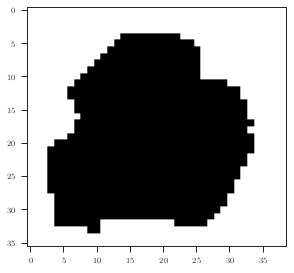

In [113]:
fig = plt.figure()
plt.imshow(mask_data_fill)
fig

In [114]:
class Inps:
    pass
inps1 = Inps()
inps1.timeseries_file = ts_file
inps1.outfile = '/tmp/velocity.h5'
inps1.startDate = '20180101'
# inps1.endDate = '20190630'
# inps1.startDate = '20190701'
# inps1.endDate = '20200630'
# inps1.startDate = '20200701'
inps1.endDate = '20201231'
inps1.excludeDate = excludeDate
inps1.key = readfile.read_attribute(inps1.timeseries_file)['FILE_TYPE']
inps1.polynomial = 1
inps1.bootstrap = True
inps1.periodic = [0.25]
inps1.step = []
inps1.ref_yx = None
inps1.ref_date = None
inps1.bootstrapCount = 400
inps1.maxMemory = 8 #GB

In [115]:
ts2v.run_timeseries2time_func(ts2v.read_date_info(inps1))

open timeseries file: timeseries_ERA5_ramp_demErr.h5
exclude date:['20171126', '20180206', '20180419', '20190321', '20190414', '20191128']
start date: 20180101
  remove date: 20171114
  remove date: 20171208
  remove date: 20171220
end date: 20201231
--------------------------------------------------
dates from input file: 96
['20171114', '20171126', '20171208', '20171220', '20180101', '20180113', '20180125', '20180206', '20180218', '20180302', '20180314', '20180326', '20180407', '20180419', '20180501', '20180513', '20180525', '20180606', '20180618', '20180630', '20180712', '20180724', '20180805', '20180817', '20180829', '20180910', '20180922', '20181004', '20181016', '20181028', '20181109', '20181121', '20181203', '20181215', '20181227', '20190108', '20190120', '20190201', '20190213', '20190225', '20190309', '20190321', '20190402', '20190414', '20190426', '20190508', '20190520', '20190601', '20190613', '20190625', '20190707', '20190719', '20190731', '20190812', '20190824', '20190905',

'/tmp/velocity.h5'

In [116]:
vel_ts, vel_ts_atr = mpu.readfile.read('/tmp/velocity.h5', datasetName='velocity')
vel_std_ts, vel_std_ts_atr = mpu.readfile.read('/tmp/velocity.h5', datasetName='velocityStd')
# vel_ts_atr

In [117]:
mask_positive = vel_ts>0

- 1 lbs = 0,000453592
- 2000 lbs = 0.9071847
- 1700 lbs = 0.771107
- 1200 lbs = 0.5443108
- 700 lbs = 0.317515
- 400 lbs = 0.181437

In [118]:
(vel_ts*mask_data).mean()

0.0016945183

In [119]:
(vel_ts*(mask_data)*(PIXEL_AREA)/0.764555*0.9071847).sum()*3.0/mask_data.sum()*mask_data_fill.sum()

9534.024813295497

In [120]:
0.764555*0.9071847

0.6935925983085

In [121]:
(vel_std_ts*(mask_data)*(PIXEL_AREA)/0.764555*0.9071847*100).sum()*3.0/mask_data.sum()*mask_data_fill.sum()

41452.847323803195

In [122]:
#Q3-Q4 2018 
83102+15066
#Q3-Q4 2018- Q1-Q2 2019
278116 - 255655
#2018-2020
83102+15066+255655+472297+235267

1061387

In [123]:
(931751.84)/1061387

0.8778624950183109

In [124]:
ts_Q_vel = []
ts_Q_velstd = []
ts_Q_acc = []
ts_Q_accstd = []
for startDate, endDate in zip(['20171231',
                              '20180331',              
                              '20180630',
                              '20180930',
                              '20181231',
                              '20190331',
                              '20190630',
                              '20190930',
                              '20191231',
                              '20200331', 
                              '20200630', 
                              '20200930'],
                              ['20180331',              
                              '20180630',
                              '20180930',
                              '20181231',
                              '20190331',
                              '20190630',
                              '20190930',
                              '20191231',
                              '20200331', 
                              '20200630', 
                              '20200930',
                              '20201231']):
    print(startDate,endDate)
    class Inps:
        pass
    inps = Inps()
    inps.timeseries_file = ts_file
    inps.outfile = '/tmp/velocity.h5'
    inps.startDate = startDate
    inps.endDate = endDate
    inps.excludeDate = excludeDate
    inps.key = readfile.read_attribute(inps.timeseries_file)['FILE_TYPE']
    inps.polynomial = 1
    inps.bootstrap = False
    inps.periodic = []
    inps.step = []
    inps.ref_yx = None
    inps.ref_date = None
    inps.bootstrapCount = 400
    inps.maxMemory = 8 #GB
    ts2v.run_timeseries2time_func(ts2v.read_date_info(inps))
    vel_ts, vel_ts_atr = mpu.readfile.read('/tmp/velocity.h5', datasetName='velocity')
    vel_std_ts, vel_std_ts_atr = mpu.readfile.read('/tmp/velocity.h5', datasetName='velocityStd')    
    ts_Q_vel.append(vel_ts)
    ts_Q_velstd.append(vel_std_ts)

20171231 20180331
open timeseries file: timeseries_ERA5_ramp_demErr.h5
exclude date:['20171126', '20180206', '20180419', '20190321', '20190414', '20191128']
start date: 20171231
  remove date: 20171114
  remove date: 20171208
  remove date: 20171220
end date: 20180331
  remove date: 20180407
  remove date: 20180501
  remove date: 20180513
  remove date: 20180525
  remove date: 20180606
  remove date: 20180618
  remove date: 20180630
  remove date: 20180712
  remove date: 20180724
  remove date: 20180805
  remove date: 20180817
  remove date: 20180829
  remove date: 20180910
  remove date: 20180922
  remove date: 20181004
  remove date: 20181016
  remove date: 20181028
  remove date: 20181109
  remove date: 20181121
  remove date: 20181203
  remove date: 20181215
  remove date: 20181227
  remove date: 20190108
  remove date: 20190120
  remove date: 20190201
  remove date: 20190213
  remove date: 20190225
  remove date: 20190309
  remove date: 20190402
  remove date: 20190426
  remove da

estimate deformation model with the following assumed time functions:
polynomial : 1
periodic   : []
step       : []
add/update the following configuration metadata:
['startDate', 'endDate', 'excludeDate', 'bootstrap', 'bootstrapCount']
--------------------------------------------------
create HDF5 file: /tmp/velocity.h5 with w mode
create dataset  : velocity    of <class 'numpy.float32'>   in size of (36, 39)             with compression = None
create dataset  : velocityStd of <class 'numpy.float32'>   in size of (36, 39)             with compression = None
close  HDF5 file: /tmp/velocity.h5
add /velocity    attribute: UNIT = m/year
add /velocityStd attribute: UNIT = m/year
reading data from file /data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5 ...
skip pixels with zero/nan value in all acquisitions
number of pixels to invert: 1365 out of 1404 (97.2%)
estimate time functions via linalg.lstsq ...
open file: /tmp/velocity.h5 with "a" mode
write dataset /vel

close  HDF5 file: /tmp/velocity.h5
add /velocity    attribute: UNIT = m/year
add /velocityStd attribute: UNIT = m/year
reading data from file /data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5 ...
skip pixels with zero/nan value in all acquisitions
number of pixels to invert: 1365 out of 1404 (97.2%)
estimate time functions via linalg.lstsq ...
open file: /tmp/velocity.h5 with "a" mode
write dataset /velocity             block: [0, 36, 0, 39]
write dataset /velocityStd          block: [0, 36, 0, 39]
close HDF5 file /tmp/velocity.h5
20181231 20190331
open timeseries file: timeseries_ERA5_ramp_demErr.h5
exclude date:['20171126', '20180206', '20180419', '20190321', '20190414', '20191128']
start date: 20181231
  remove date: 20171114
  remove date: 20171208
  remove date: 20171220
  remove date: 20180101
  remove date: 20180113
  remove date: 20180125
  remove date: 20180218
  remove date: 20180302
  remove date: 20180314
  remove date: 20180326
  remove date: 2

20190630 20190930
open timeseries file: timeseries_ERA5_ramp_demErr.h5
exclude date:['20171126', '20180206', '20180419', '20190321', '20190414', '20191128']
start date: 20190630
  remove date: 20171114
  remove date: 20171208
  remove date: 20171220
  remove date: 20180101
  remove date: 20180113
  remove date: 20180125
  remove date: 20180218
  remove date: 20180302
  remove date: 20180314
  remove date: 20180326
  remove date: 20180407
  remove date: 20180501
  remove date: 20180513
  remove date: 20180525
  remove date: 20180606
  remove date: 20180618
  remove date: 20180630
  remove date: 20180712
  remove date: 20180724
  remove date: 20180805
  remove date: 20180817
  remove date: 20180829
  remove date: 20180910
  remove date: 20180922
  remove date: 20181004
  remove date: 20181016
  remove date: 20181028
  remove date: 20181109
  remove date: 20181121
  remove date: 20181203
  remove date: 20181215
  remove date: 20181227
  remove date: 20190108
  remove date: 20190120
  remo

close  HDF5 file: /tmp/velocity.h5
add /velocity    attribute: UNIT = m/year
add /velocityStd attribute: UNIT = m/year
reading data from file /data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5 ...
skip pixels with zero/nan value in all acquisitions
number of pixels to invert: 1365 out of 1404 (97.2%)
estimate time functions via linalg.lstsq ...
open file: /tmp/velocity.h5 with "a" mode
write dataset /velocity             block: [0, 36, 0, 39]
write dataset /velocityStd          block: [0, 36, 0, 39]
close HDF5 file /tmp/velocity.h5
20191231 20200331
open timeseries file: timeseries_ERA5_ramp_demErr.h5
exclude date:['20171126', '20180206', '20180419', '20190321', '20190414', '20191128']
start date: 20191231
  remove date: 20171114
  remove date: 20171208
  remove date: 20171220
  remove date: 20180101
  remove date: 20180113
  remove date: 20180125
  remove date: 20180218
  remove date: 20180302
  remove date: 20180314
  remove date: 20180326
  remove date: 2

close  HDF5 file: /tmp/velocity.h5
add /velocity    attribute: UNIT = m/year
add /velocityStd attribute: UNIT = m/year
reading data from file /data1/data/sar_jhb_dumps/mintpy/robinsons_deep/timeseries_ERA5_ramp_demErr.h5 ...
skip pixels with zero/nan value in all acquisitions
number of pixels to invert: 1365 out of 1404 (97.2%)
estimate time functions via linalg.lstsq ...
open file: /tmp/velocity.h5 with "a" mode
write dataset /velocity             block: [0, 36, 0, 39]
write dataset /velocityStd          block: [0, 36, 0, 39]
close HDF5 file /tmp/velocity.h5
20200630 20200930
open timeseries file: timeseries_ERA5_ramp_demErr.h5
exclude date:['20171126', '20180206', '20180419', '20190321', '20190414', '20191128']
start date: 20200630
  remove date: 20171114
  remove date: 20171208
  remove date: 20171220
  remove date: 20180101
  remove date: 20180113
  remove date: 20180125
  remove date: 20180218
  remove date: 20180302
  remove date: 20180314
  remove date: 20180326
  remove date: 2

In [125]:
(ts_data.sum(axis=(0,))<0)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [126]:
ts_cum_sum = (ts_data*mask_data).sum(axis=(1,2))/mask_data.sum()
ts_cum_sum.shape

(96,)

In [127]:
df_ts_data = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(the_dates))

In [128]:
df_ts_data = df_ts_data.resample('12D').mean().rename(columns=lambda x: 'Displacement')

In [129]:
df_ts_data['Count'] = 1

In [130]:
for i in excludeDate:
    df_ts_data.loc[i[:8]:i[:8]] = 0

In [131]:
df_ts_data['Days'] = 1

In [132]:
# df_ts_data.Displacement *= 365
df_ts_data.Displacement *= 100 #convert to cm
# df_ts_data.Displacement /= 12 # get a daily value

In [133]:
# inps2 = ts2v.read_date_info(inps)
# inps2.periodic = []
# model, num_param = ts2v.read_inps2model(inps2)
# G = ts2v.timeseries.get_design_matrix4time_func(inps2.dateList, model)
# # G, m[:, mask], e2 = estimate_time_func(inps.dateList, ts_data, model)

In [134]:
# df_ts_data.loc[inps2.dateList].Displacement.values

In [135]:
# np.linalg.lstsq(G, df_ts_data.loc[inps1.dateList].Displacement.values, rcond=None)

In [136]:
# np.linalg.lstsq(np.c_[np.ones(96),np.arange(96)/96*3], df_ts_data.Displacement.values, rcond=None)

In [137]:
# np.linalg.lstsq(G, df_ts_Q.Adj_Displacement.values, rcond=None)

In [138]:
# np.linalg.lstsq(np.c_[np.ones(92),np.arange(92)/92*3], df_ts_Q.Adj_Displacement.values, rcond=None)

In [139]:
df_ts_B = pd.DataFrame(ts_cum_sum, columns=['Displacement'], index=pd.DatetimeIndex(the_dates))
df_ts_B.loc[excludeDate, 'Displacement'] = np.nan
df_ts_B  = df_ts_B['2018-01-01':]
df_ts_B.Displacement *= 100
# df_ts_B.Displacement /= 12
df_ts_B

,Displacement
2018-01-01,0.023614
2018-01-13,-0.063440
2018-01-25,0.148998
2018-02-06,NaN
2018-02-18,0.212292
...,...
2020-11-10,1.070392
2020-11-22,1.081151
2020-12-04,1.187110
2020-12-16,1.234332


In [140]:
df_ts_data.loc[excludeDate, 'Displacement'] = np.nan
df_ts_data.Displacement.interpolate(method='linear')

2017-11-14    0.000125
2017-11-26    0.019287
2017-12-08    0.038449
2017-12-20   -0.009287
2018-01-01    0.023614
                ...   
2020-11-10    1.070392
2020-11-22    1.081151
2020-12-04    1.187110
2020-12-16    1.234332
2020-12-28    1.242919
Freq: 12D, Name: Displacement, Length: 96, dtype: float32

In [141]:
df_ts_A = df_ts_data.copy()
df_ts_A.loc[excludeDate, 'Displacement'] = np.nan
df_ts_A = df_ts_A.resample('D').last()
df_ts_A.Displacement = df_ts_A.Displacement.interpolate(method='linear').diff()
df_ts_A = df_ts_A.bfill(limit=11) \
                 .resample('A') \
                 .sum()
df_ts_A['Velocity'] = df_ts_A.Displacement/df_ts_A.Days*365.25
df_ts_A.Displacement = (df_ts_A.Displacement).cumsum()
# df_ts_A.Velocity = df_ts_A.Velocity/df_ts_A.Days*365.25
df_ts_A = df_ts_A['2018-01-01':]
df_ts_A

,Displacement,Count,Days,Velocity
2018-12-31,0.393574,341.0,365.0,0.371484
2019-12-31,0.715501,329.0,365.0,0.322147
2020-12-31,1.244391,363.0,363.0,0.532169


In [142]:
df_ts_Q = df_ts_data.copy()
df_ts_Q.loc[excludeDate, 'Displacement'] = np.nan
df_ts_Q = df_ts_Q.resample('D').last()
df_ts_Q.Displacement = df_ts_Q.Displacement.interpolate(method='linear').diff()
df_ts_Q = df_ts_Q.bfill(limit=11) \
                 .resample('Q') \
                 .sum()
df_ts_Q['Velocity']  = df_ts_Q.Displacement/df_ts_Q.Days*365.25
df_ts_Q.Displacement = df_ts_Q.Displacement.cumsum()
df_ts_Q = df_ts_Q
df_ts_Q

,Displacement,Count,Days,Velocity
2017-12-31,0.022344,36.0,48.0,0.170025
2018-03-31,0.268083,78.0,90.0,0.997290
2018-06-30,0.252371,79.0,91.0,-0.063062
2018-09-30,0.192518,92.0,92.0,-0.237623
2018-12-31,0.393574,92.0,92.0,0.798213
2019-03-31,0.573379,78.0,90.0,0.729707
2019-06-30,0.568568,79.0,91.0,-0.019309
2019-09-30,0.668950,92.0,92.0,0.398528
2019-12-31,0.715501,80.0,92.0,0.184810
2020-03-31,0.916475,91.0,91.0,0.806657


In [143]:
for i, d in zip(ts_Q_vel, df_ts_Q.index):
     df_ts_Q.loc[d, 'Velocity_new'] = i.mean()*100
df_ts_Q

,Displacement,Count,Days,Velocity,Velocity_new
2017-12-31,0.022344,36.0,48.0,0.170025,0.915012
2018-03-31,0.268083,78.0,90.0,0.997290,-0.333628
2018-06-30,0.252371,79.0,91.0,-0.063062,0.017677
2018-09-30,0.192518,92.0,92.0,-0.237623,0.521628
2018-12-31,0.393574,92.0,92.0,0.798213,-0.032165
2019-03-31,0.573379,78.0,90.0,0.729707,-0.075753
2019-06-30,0.568568,79.0,91.0,-0.019309,0.378675
2019-09-30,0.668950,92.0,92.0,0.398528,0.787708
2019-12-31,0.715501,80.0,92.0,0.184810,0.815187
2020-03-31,0.916475,91.0,91.0,0.806657,0.366388


In [144]:
df_ts_M = df_ts_data.copy()
df_ts_M.loc[excludeDate, 'Displacement'] = np.nan
df_ts_M = df_ts_M.resample('D').last()
df_ts_M.Displacement = df_ts_M.Displacement.interpolate(method='linear').diff()
df_ts_M = df_ts_M.bfill(limit=11) \
                 .resample('M') \
                 .sum()
df_ts_M['Velocity']  = df_ts_M.Displacement/df_ts_M.Days*365.25
df_ts_M.Displacement = df_ts_M.Displacement.cumsum()
df_ts_M = df_ts_M['2018-01-01':]
df_ts_M

,Displacement,Count,Days,Velocity
2018-01-31,0.166293,25.0,31.0,1.696042
2018-02-28,0.153867,22.0,28.0,-0.162098
2018-03-31,0.268083,31.0,31.0,1.345727
2018-04-30,0.241582,18.0,30.0,-0.322651
2018-05-31,0.232559,31.0,31.0,-0.106310
2018-06-30,0.252371,30.0,30.0,0.241217
2018-07-31,0.311297,31.0,31.0,0.694277
2018-08-31,0.299329,31.0,31.0,-0.141016
2018-09-30,0.192519,30.0,30.0,-1.300414
2018-10-31,0.320980,31.0,31.0,1.513563


In [145]:
#Q3-Q4 2018 
83102+15066
#Q3-Q4 2018- Q1-Q2 2019
278116 - 255655
#2018-2020
83102+15066+255655+472297+235267

1061387

In [146]:
df_ts_Q['2018-01-01':'2018-06-30']

,Displacement,Count,Days,Velocity,Velocity_new
2018-03-31,0.268083,78.0,90.0,0.997290,-0.333628
2018-06-30,0.252371,79.0,91.0,-0.063062,0.017677


In [147]:
0.764555*0.9071847

0.6935925983085

In [148]:
747831.01/1061387

0.7045790178323269

In [149]:
vel_ts.mean()

0.00979412

In [150]:
(vel_ts*mask_data).sum()/mask_data.sum()*100

1.0923645054315723

In [151]:
ts_disp = ts_data[pd.DatetimeIndex(the_dates)>='2018-01-01']
ts_disp -= ts_disp[0]

In [152]:
ts_attr['REF_DATE']

'20180101'

In [153]:
((1061387/1500*1000)/mask_data_fill.sum()/PIXEL_AREA) #we need this many m/year

0.9552168724759527

In [154]:
(5.547)*(365.25/12) #cm/year or 1.68 m/year

168.83681249999998

In [155]:
594145.97 < PIXEL_AREA*mask_data_fill.sum()

True

In [156]:
(0.9552168724759527*PIXEL_AREA*mask_data_fill.sum())/0.764555*0.9071847

839594.3149316922

In [157]:
td = df_ts_Q.Displacement['2020-12-31'] - df_ts_Q.Displacement['2018-12-31']

In [158]:
(mask_data*td*(PIXEL_AREA)/0.764555*0.9071847).sum()/mask_data.sum()*mask_data_fill.sum()

747831.0125379938

In [159]:
(
(mask_data*df_ts_A.Velocity.mean()*(PIXEL_AREA)/0.764555*0.9071847).sum()*3.0/mask_data.sum()*mask_data_fill.sum(),
(mask_data*df_ts_Q.Velocity.mean()*(PIXEL_AREA)/0.764555*0.9071847).sum()*3.0/mask_data.sum()*mask_data_fill.sum(),
(mask_data*df_ts_M.Velocity.mean()*(PIXEL_AREA)/0.764555*0.9071847).sum()*3.0/mask_data.sum()*mask_data_fill.sum()
)

(1077424.9548783342, 1033535.5353354005, 1064018.5615822626)

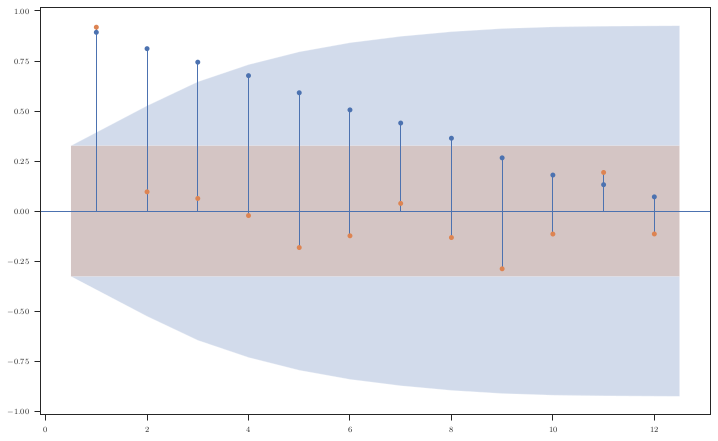

In [160]:
fig = plt.figure(figsize=(12,7.5))
ax = fig.subplots()
plot_acf(df_ts_M.Displacement, zero=False, ax=ax, lags=12)
plot_pacf(df_ts_M.Displacement, zero=False, ax=ax, lags=12)
ax.set_title(None)
fig

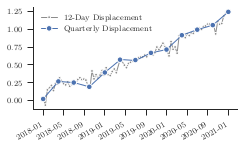

In [161]:
fig = plt.figure(figsize=(width,height))
ax1 = fig.subplots()
sns.lineplot(data=df_ts_B.Displacement, marker='.', color='C7', ax=ax1);
sns.lineplot(data=df_ts_Q.Displacement, marker='o', color='C0', ax=ax1)
# ax1.set_ylabel(r'Displacement [m]')
ax1.set_ylabel(None)
plt.legend(ax1.lines,["12-Day Displacement"]+["Quarterly Displacement"], loc='upper left')
sns.despine(right=True, trim=False)
fig.autofmt_xdate()
# ax1.text(1.0,0.05,'Johannesburg',
#         horizontalalignment='right',
#         verticalalignment='bottom',
#         transform=ax1.transAxes)
fig.tight_layout()
fig.savefig("pgf/jhb_displacement_velocity.pgf", backend='pgf', dpi=600)
fig

In [162]:
stringency = pd.read_csv("/data1/data/stringency_index.csv", index_col=1, parse_dates=True, )
stringency = stringency.T
stringency = stringency[2:] 
stringency.index = pd.DatetimeIndex(stringency.index)

In [163]:
STR = stringency['ZAF'].astype(float)
df_ts_Q['Stringency'] = STR.resample('Q') \
                           .mean()['2018-01-01':] 
df_ts_Q['Stringency'].fillna(0, inplace=True)

In [164]:
df_ts_M['Stringency'] = STR.resample('M') \
                           .mean()['2018-01-01':] 
df_ts_M['Stringency'].fillna(0, inplace=True)

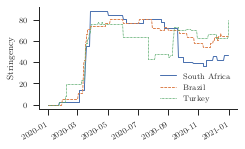

In [165]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=stringency[['ZAF','BRA','TUR']].astype(float).loc[:'2020-12-31'])
ax1.set_ylabel(r'Stringency')
plt.legend(["South Africa","Brazil","Turkey"], loc='lower right')
sns.despine(right=True, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/stringency.pgf", backend='pgf', dpi=600)
fig

In [166]:
country = "South Africa Seasonal"
GDP = pd.read_csv("/data1/data/GDP.csv" )
GDP.index = pd.DatetimeIndex(GDP.Date)
GDP = GDP.resample('Q').max()
df_ts_Q.loc[:, "GDP"] = GDP[country]
df_ts_Q['Delta_GDP'] = GDP[country].diff()

GDP_M = (GDP[country]).resample('M').last()
GDP_M['2020-10-31'] = np.NaN
GDP_M['2020-11-30'] = np.NaN
GDP_M['2020-12-31'] = np.NaN

GDP_Q = GDP[country]

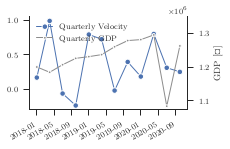

In [167]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Velocity.loc[:'2020-09-30'], marker='o', color='C0');
# ax1.set_ylabel(r'Acceleration [cm/year\textsuperscript{2}]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
ax2.set_ylabel(r'GDP [\textcurrency]')
# ax2.set_ylabel(None)
ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Velocity"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_acceleration.pgf", backend='pgf', dpi=600)
fig

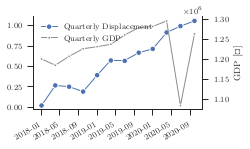

In [168]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_Q.Displacement.loc[:'2020-09-30'], marker='o', color='C0')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
# ax1.set_ylim(bottom=0)
ax2 = plt.twinx()
sns.lineplot(data=df_ts_Q.GDP, ax=ax2, marker='.', color='C7')
ax2.set_ylabel(r'GDP [\textcurrency]')
# ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Quarterly Displacement"]+["Quarterly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_velocity_GDP.pgf", backend='pgf', dpi=600)
fig

In [169]:
df_ts_M['GDP_naive']      = (df_ts_Q.GDP).resample('M').last()
df_ts_M['Delta_GDP_naive']= (df_ts_Q.Delta_GDP).resample('M').last()
df_ts_M.GDP_naive         =  df_ts_M.GDP_naive.bfill()
df_ts_M.Delta_GDP_naive   =  df_ts_M.Delta_GDP_naive.bfill()
df_ts_M['GDP'] = GDP_M.reset_index() \
                      .interpolate(method='spline', order=3) \
                      .set_index('Date') \
                      .shift(-1) #center on the middle of the quarter
df_ts_M['Delta_GDP'] = GDP_M.reset_index() \
                      .interpolate(method='spline', order=3) \
                      .set_index('Date') \
                      .shift(-1) \
                      .diff()
df_ts_M = df_ts_M[:'2020-09-30']
df_ts_M

,Displacement,Count,Days,Velocity,Stringency,GDP_naive,Delta_GDP_naive,GDP,Delta_GDP
2018-01-31,0.166293,25.0,31.0,1.696042,0.000000,1184810.6,-15668.4,1.189141e+06,-7353.421144
2018-02-28,0.153867,22.0,28.0,-0.162098,0.000000,1184810.6,-15668.4,1.184811e+06,-4330.278510
2018-03-31,0.268083,31.0,31.0,1.345727,0.000000,1184810.6,-15668.4,1.188171e+06,3360.236990
2018-04-30,0.241582,18.0,30.0,-0.322651,0.000000,1207223.6,22413.0,1.196968e+06,8797.129733
2018-05-31,0.232559,31.0,31.0,-0.106310,0.000000,1207223.6,22413.0,1.207224e+06,10255.633277
2018-06-30,0.252371,30.0,30.0,0.241217,0.000000,1207223.6,22413.0,1.215668e+06,8444.510240
2018-07-31,0.311297,31.0,31.0,0.694277,0.000000,1226162.8,18939.2,1.221884e+06,6215.808724
2018-08-31,0.299329,31.0,31.0,-0.141016,0.000000,1226162.8,18939.2,1.226163e+06,4278.881036
2018-09-30,0.192519,30.0,30.0,-1.300414,0.000000,1226162.8,18939.2,1.228832e+06,2669.510383
2018-10-31,0.320980,31.0,31.0,1.513563,0.000000,1231225.4,5062.6,1.230354e+06,1521.872835


In [170]:
dates_prior = slice('2018-01-01','2019-12-31')
dates_full = slice('2018-01-01','2020-08-31')

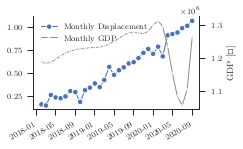

In [171]:
fig = plt.figure(figsize=(width,height))
ax1 = sns.lineplot(data=df_ts_M.Displacement.loc[dates_full], marker='o', color='C0')
# ax1.set_ylabel(r'Velocity [cm/year]')
ax1.set_ylabel(None)
ax2 = plt.twinx()
# sns.lineplot(data=df_ts_M.GDP_naive.loc[dates_full], ax=ax2, marker='.', color='C1')
sns.lineplot(data=df_ts_M.GDP.loc[dates_full], ax=ax2, marker='.', markersize=4, color='C7')
ax2.set_ylabel(r'GDP [\textcurrency]')
# ax2.set_ylim(top=1350000)
plt.legend(ax1.lines+ax2.lines, ["Monthly Displacement"]+["Monthly GDP"], loc='upper left')
sns.despine(right=False, trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_velocity_GDP_monthly.pgf", backend='pgf', dpi=600)
fig

https://columbiaeconomics.com/2010/01/20/how-economists-convert-quarterly-data-into-monthly-cubic-spline-interpolation/comment-page-1/

In [172]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_prior, X_var]
y = df_ts_M.Displacement[dates_prior]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     241.1
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           2.45e-13
Time:                        12:52:49   Log-Likelihood:                 31.124
No. Observations:                  24   AIC:                            -58.25
Df Residuals:                      22   BIC:                            -55.89
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.3723      0.437    -14.590      0.000      -7.228      -5.516
GDP         5.487e-06   3.53e-07     15.527      0.000    4.79e-06    6.18e-06
==============================================================================
Omnibus:                        1.901   Durbin-Watson:                   1.147
Prob(Omnibus):                  0.387   Jarque-Bera (JB):                0.631
Skew:                          -0.050   Prob(JB):                        0.729
Kurtosis:                       3.788   Cond. No.                     4.76e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 4.76e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [173]:
import statsmodels.api as sm
X_var = ['GDP']
X = df_ts_M.loc[dates_full, X_var]
y = df_ts_M.Displacement[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                    0.2251
Date:                Fri, 04 Jun 2021   Prob (F-statistic):              0.639
Time:                        12:52:49   Log-Likelihood:                -3.9155
No. Observations:                  32   AIC:                             11.83
Df Residuals:                      30   BIC:                             14.76
Df Model:                           1                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2451      1.554      0.801      0.423      -1.801       4.291
GDP        -5.665e-07   1.19e-06     -0.474      0.635   -2.91e-06    1.77e-06
==============================================================================
Omnibus:                        7.023   Durbin-Watson:                   0.077
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                2.142
Skew:                           0.129   Prob(JB):                        0.343
Kurtosis:                       1.759   Cond. No.                     2.56e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 2.56e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [183]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
X = df_ts_M.loc[dates_full, X_var].copy()
X.GDP /= 1000000
y = df_ts_M.Displacement[dates_full]
X = sm.add_constant(X)
# X['trend'] = range(0,len(X))
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':12})
# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     50.20
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           3.81e-10
Time:                        13:33:20   Log-Likelihood:                 21.498
No. Observations:                  32   AIC:                            -37.00
Df Residuals:                      29   BIC:                            -32.60
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4764      1.364     -2.549      0.011      -6.149      -0.804
GDP            3.1571      1.087      2.905      0.004       1.027       5.287
Stringency     0.0110      0.002      6.530      0.000       0.008       0.014
==============================================================================
Omnibus:                        0.195   Durbin-Watson:                   1.024
Prob(Omnibus):                  0.907   Jarque-Bera (JB):                0.098
Skew:                          -0.118   Prob(JB):                        0.952
Kurtosis:                       2.867   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 12 lags and without small sample correction
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [184]:
print("GDP", X.GDP.min(), X.GDP.max())
print("Displacement", X.GDP.min()*1.087, X.GDP.max()*1.087)
print("Stringency", X.Stringency.min(), X.Stringency.max())
print("Stringency", X.Stringency.min()*0.002, X.Stringency.max()*0.002)

GDP 1.0576334084697971 1.3129287171133905
Displacement 1.1496475150066694 1.4271535155022554
Stringency 0.0 87.96000000000002
Stringency 0.0 0.17592000000000005


In [175]:
import statsmodels.api as sm
X_var = ['GDP','Stringency']
dates = slice('2018-03-31','2020-09-30')
X = df_ts_Q.loc[dates, X_var]
y = df_ts_Q.Displacement[dates]
X = sm.add_constant(X)
# X['trend'] = range(1,len(X)+1)
# Note the difference in argument order
model = sm.OLS(y, X).fit(cov_type='HAC',cov_kwds={'maxlags':4})
X_all = df_ts_Q.loc[dates, X_var]
X_all.Stringency = 0.0
X_all = sm.add_constant(X_all)
# X_all['trend'] = range(1,len(X)+1)
predictions = model.predict(X_all) # make the predictions by the model
# Print out the statistics
model.summary()

/home/tvanzyl/anaconda3/envs/mintpy/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     31.63
Date:                Fri, 04 Jun 2021   Prob (F-statistic):           0.000159
Time:                        12:52:49   Log-Likelihood:                 6.5314
No. Observations:                  11   AIC:                            -7.063
Df Residuals:                       8   BIC:                            -5.869
Df Model:                           2                                         
Covariance Type:                  HAC                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0541      1.151     -2.652      0.008      -5.311      -0.797
GDP         2.842e-06    9.1e-07      3.123      0.002    1.06e-06    4.63e-06
Stringency     0.0098      0.002      6.407      0.000       0.007       0.013
==============================================================================
Omnibus:                        1.772   Durbin-Watson:                   1.064
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.089
Skew:                          -0.496   Prob(JB):                        0.580
Kurtosis:                       1.820   Cond. No.                     3.11e+07
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity and autocorrelation robust (HAC) using 4 lags and without small sample correction
[2] The condition number is large, 3.11e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
f'{2.842e-06:.20f}'

'0.00000284200000000000'

In [177]:
df_ts_Q["Prediction"] = predictions
df_ts_Q["Residual_Displacement"] = (df_ts_Q.Displacement-df_ts_Q.Prediction)

In [178]:
df_ts_Q.loc['20180101':'20191231',['Velocity','Displacement','GDP','Delta_GDP','Residual_Displacement']].corr()

,Velocity,Displacement,GDP,Delta_GDP,Residual_Displacement
Velocity,1.000000,0.092418,-0.293103,-0.806411,0.369500
Displacement,0.092418,1.000000,0.876822,0.064687,0.931303
GDP,-0.293103,0.876822,1.000000,0.394980,0.641453
Delta_GDP,-0.806411,0.064687,0.394980,1.000000,-0.196008
Residual_Displacement,0.369500,0.931303,0.641453,-0.196008,1.000000


In [179]:
df_ts_Q.loc['20180101':'20200930',['Velocity','Displacement','GDP','Delta_GDP','Residual_Displacement','Stringency']].corr()

,Velocity,Displacement,GDP,Delta_GDP,Residual_Displacement,Stringency
Velocity,1.000000,0.118642,-0.000684,-0.108466,0.106802,-0.065475
Displacement,0.118642,1.000000,0.059869,-0.028696,0.867493,0.743517
GDP,-0.000684,0.059869,1.000000,0.749801,-0.444622,-0.488313
Delta_GDP,-0.108466,-0.028696,0.749801,1.000000,-0.399408,-0.190734
Residual_Displacement,0.106802,0.867493,-0.444622,-0.399408,1.000000,0.910527
Stringency,-0.065475,0.743517,-0.488313,-0.190734,0.910527,1.000000


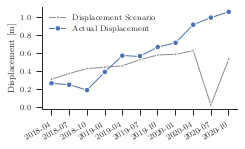

In [180]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=df_ts_Q.Prediction, marker='.', color='C7')
sns.lineplot(data=df_ts_Q.Displacement.loc[dates], marker='o', color='C0', ax=ax)
ax.set_ylabel(r'Displacement [m]')
plt.legend(["Displacement Scenario","Actual Displacement"], loc='upper left')
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_scenario_velocity.pgf", backend='pgf', dpi=600)
fig

In [181]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
model = AutoReg(df_ts_M.loc[:'20200731','Displacement'], lags=1, trend='t', exog=df_ts_M.loc[:'20200731',['Stringency','GDP']])
# model = ARIMA(df_ts_M.loc[:'20200630','Velocity'], order=(1,0,0), exog=df_ts_M.loc[:'20200630',['Stringency','GDP']])
res = model.fit()
print(res.summary())
pred_res = res.get_prediction(start='20180131', end='20200930', exog_oos=df_ts_M.loc['20200830':'20200930',['Stringency','GDP']])
# pred_res = res.get_prediction(start='20180131', end='20200930', exog=df_ts_M.loc['20200731':'20200930',['Stringency','GDP']])
P = pred_res.conf_int()[dates]
P['mean'] = pred_res.predicted_mean[dates]
PP = P.unstack().rename('Displacement').to_frame().reset_index()

                            AutoReg Model Results                             
Dep. Variable:           Displacement   No. Observations:                   31
Model:                   AutoReg-X(1)   Log Likelihood                  47.698
Method:               Conditional MLE   S.D. of innovations              0.049
Date:                Fri, 04 Jun 2021   AIC                             -5.684
Time:                        12:52:50   BIC                             -5.451
Sample:                    02-28-2018   HQIC                            -5.610
                         - 07-31-2020                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
trend               0.0248      0.005      5.273      0.000       0.016       0.034
Displacement.L1     0.0522      0.174      0.300      0.764      -0.288       0.392
Stringency          0.0014      

/home/tvanzyl/anaconda3/envs/mintpy/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


<ipython-input-182-ad30ae29f1ab>:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(width,height))


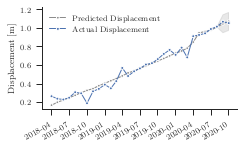

In [182]:
fig = plt.figure(figsize=(width,height))
ax = sns.lineplot(data=PP, x='level_1', y='Displacement',  marker='.', color='C7')
ax.set_xlabel(None)
sns.lineplot(data=df_ts_M.Displacement.loc[dates], marker='o', markersize=3, color='C0', ax=ax)
ax.set_ylabel(r'Displacement [m]')
plt.legend(["Predicted Displacement","Actual Displacement"], loc='upper left')
sns.despine(trim=False);
fig.autofmt_xdate()
fig.tight_layout()
fig.savefig("pgf/jhb_predicted_velocity.pgf", backend='pgf', dpi=600)
fig